# Exploratory Analysis of Bike Trip Data
by **Mikael Lopez** (as part of the **Data Analyst Nanodegree**)

In this report I'm going to explore Ford GoBike trip data from "trips taken by members of the service for the month of February of 2019."[\*](https://www.kaggle.com/chirag02/ford-gobike-2019feb-tripdata)

In [3]:
# Import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
# Gather the data: Load the dataset into a pandas dataframe
df = pd.read_csv("biketripdata.csv")

## Preliminary Exploration

Let's begin by assessing the data!

In [3]:
# Assess the data: Visual assessment #1
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [336]:
# Visual assessment #3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

The original dataset contains 183412 rows and 16 columns.

## Preliminary Wrangling

Since I'm going to alter the dataset, I'll create a copy of it:

In [5]:
# Create a deep copy to avoid altering the original dataset
df2 = df.copy()

For the sake of a less complicated exploratory (and later explanatory) analysis, I'll exclude any rows that contain null values:

In [6]:
# Code: Create a subset of the original dataset
df2 = df2[(df2.member_gender.notnull()) & (df2.start_station_id.notnull())]

In [7]:
# Test: Check if there are any null values in the subset
df2.isnull().sum().sum()

0

I noticed that one of the variables I think I might use, **member_birth_year**, is a *float* instead of an *int*, so I'll change its data type:

In [8]:
# Code: Convert 'member_birth_year' to int
df2.member_birth_year = df2.member_birth_year.astype(int)

In [9]:
# Test: Check the data type of 'member_birth_year'
df2.member_birth_year.dtype

dtype('int64')

(The data types of **start_station_id** and **end_station_id** could probably also be converted to *int*, but since I don't think I'll use them in my analysis, I'll leave them untouched for now.)

And I also noticed that two other variables, **start_time** and **end_time**, should have their data types converted, this time to *datetime*:

In [10]:
# Code: Convert 'start_time' & 'end_time' to datetime
df2.start_time = pd.to_datetime(df2.start_time)
df2.end_time = pd.to_datetime(df2.end_time)

In [11]:
# Test: Check the data types of 'start_time' & 'end_time'
df2.dtypes[["start_time", "end_time"]]

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

How many rows are we going to explore in this subset?

In [13]:
# Get the dataset's row count
df2.shape[0]

174952

Let's begin exploring these 170,000 rows of bike trip data!

## Univariate Exploration

The variables that interest me are **member_gender**, **user_type**, **member_birth_year**, and **duration_sec** so let's do some univariate exploration of those four variables.

How many users are there in each gender category?

In [14]:
# Get value counts for the 'member_gender' column
gender_counts = df2.member_gender.value_counts()
gender_order = df2.member_gender.value_counts().index
gender_counts

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

Since **member_gender** only has three categories, the value counts are easy to interpret, but I'll make it even easier to interpret using a bar chart:

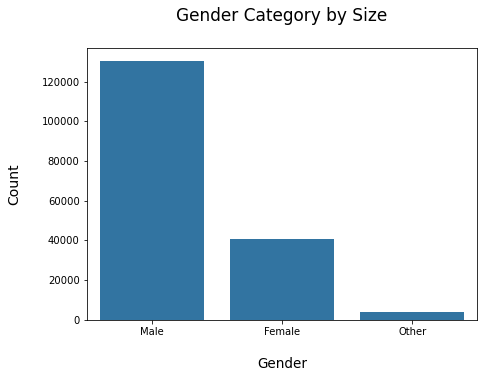

In [43]:
base_color = sb.color_palette()[0]

# Combine pyplot and seaborn to create a simple bar chart
plt.figure(figsize = [7, 5])
sb.countplot(data = df2, x = "member_gender", color = base_color, order = gender_order)
plt.title("Gender Category by Size\n", fontsize = 17)
plt.xlabel("\nGender", fontsize = 13.5)
plt.ylabel("Count\n", fontsize = 14);

Unless the specific count for each category is important, an even simpler version could be the best way to visualize how many more men than women and others the subset contains.

How many users are there in each **user_type** category?

In [29]:
# Get value counts for the 'user_type' column
user_type_counts = df2.user_type.value_counts()
user_type_labels = user_type_counts.index
user_type_counts

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

As this course has pointed out, pie charts are best for cases with few categories and significant differences in proportional sizes (a pie chart could've been appropriate for the gender count as well), so I'll use a pie chart to emphasize the difference in size between the two user type categories:

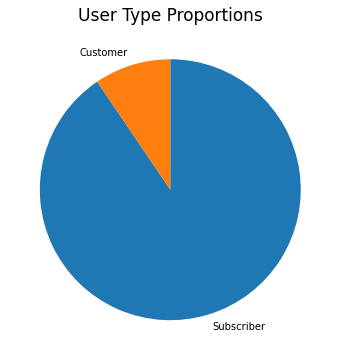

In [32]:
# Use pyplot to create a simple pie chart
plt.figure(figsize = [6, 6])
plt.pie(user_type_counts, labels = user_type_labels, startangle = 90, counterclock = False)
plt.title("User Type Proportions", fontsize = 17);

This pie chart leaves no doubt about which category is the larger one.

What does the distribution of **member_birth_year** values look like?

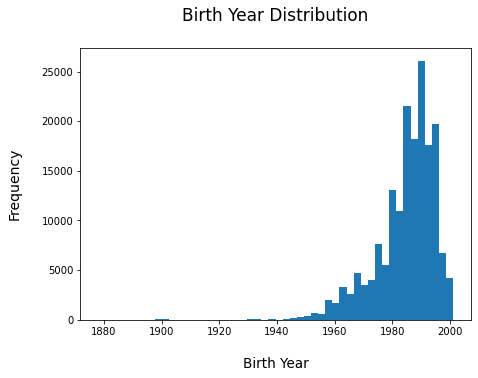

In [34]:
# Use pyplot to create a basic histogram
plt.figure(figsize = [7, 5])
plt.hist(df2.member_birth_year, bins = 50)
plt.title("Birth Year Distribution\n", fontsize = 17)
plt.xlabel("\nBirth Year", fontsize = 13.5)
plt.ylabel("Frequency\n", fontsize = 14);

The distribution is clearly left-skewed, which in this case means the majority of users are in the "younger" side of the age range, but because of a long tail the histogram isn't very detailed, so let's "zoom in" a bit:

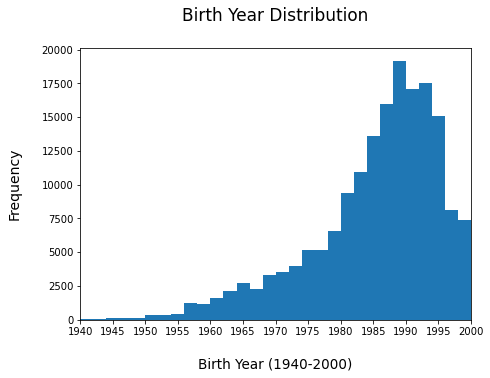

In [35]:
# Use numpy to create bins and ticks in order to better customize the histogram
bins = np.arange(1940, 2000 + 2, 2)
xticks = np.arange(1940, 2000 + 1, 5)

plt.figure(figsize = [7, 5])
plt.hist(df2.member_birth_year, bins = bins)
plt.title("Birth Year Distribution\n", fontsize = 17)
plt.xlabel("\nBirth Year (1940-2000)", fontsize = 13.5)
plt.ylabel("Frequency\n", fontsize = 14)
plt.xlim(1940, 2000) # Limit the chart to years between 1940 and 2000
plt.xticks(xticks);

This histogram isn't significantly different than the previous one, but the upward curve doesn't appear as jagged, and we can clearly see that most users were born between the mid 80s and mid 90s. But a better way to describe the age demographic of users is to actually display this as a histogram of user age.

In [36]:
# Create an 'age' column by subtracting the "current year" from the birth year
# (I'll use 2018 since this dataset only contains data from February of 2019)
df2["age"] = 2018 - df2.member_birth_year

In [37]:
# Check the first five values of the 'age' column
df2.age.head()

0    34
2    46
3    29
4    44
5    59
Name: age, dtype: int64

What does the distribution of **age** look like?

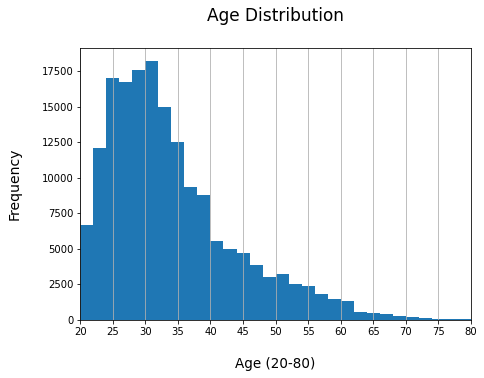

In [38]:
bins = np.arange(20, 80 + 2, 2)
ticks = np.arange(20, 80 + 2, 5)

plt.figure(figsize = [7, 5])
plt.hist(df2.age, bins = bins)
plt.title("Age Distribution\n", fontsize = 17)
plt.xlabel("\nAge (20-80)", fontsize = 13.5)
plt.ylabel("Frequency\n", fontsize = 14)
plt.xlim(20, 80) # Limit the histogram to ages between 20 and 80
plt.xticks(ticks)
plt.grid(axis = "x"); # Add a grid on the x-axis in order to more easily interpret the chart

The histogram of **age** is, of course, an inverted version of the birth year histogram. Now we can say that this right-skewed distribution shows us that largest group of users are between about 25-35, which is, I think, more insightful.

Finally, what does the distribution of **duration_sec** values look like?

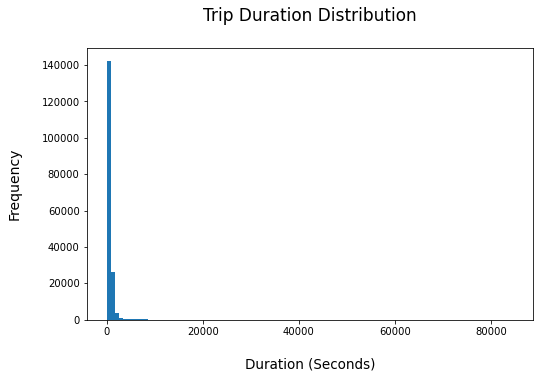

In [39]:
plt.figure(figsize = [8, 5])
plt.hist(df2.duration_sec, bins = 100)
plt.title("Trip Duration Distribution\n", fontsize = 17)
plt.xlabel("\nDuration (Seconds)", fontsize = 13.5)
plt.ylabel("Frequency\n", fontsize = 14);

Most trips are clearly relatively short, but this is a very, very long tail so let's zoom in quite a bit to make more sense of this:

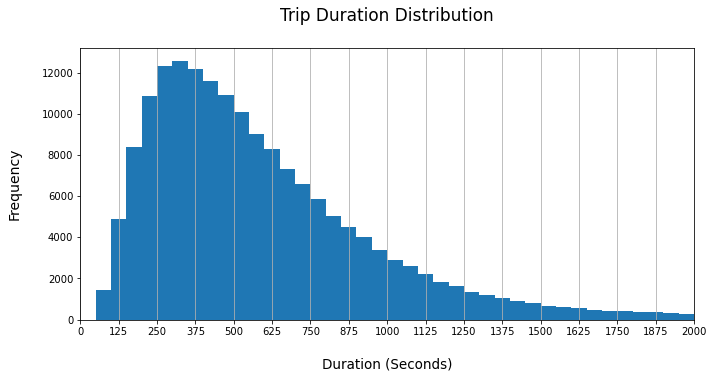

In [40]:
bins = np.arange(0, 2000 + 50, 50)
xticks = np.arange(0, 2000 + 1, 125)

plt.figure(figsize = [11, 5])
plt.hist(df2.duration_sec, bins = bins)
plt.title("Trip Duration Distribution\n", fontsize = 17)
plt.xlabel("\nDuration (Seconds)", fontsize = 13.5)
plt.ylabel("Frequency\n", fontsize = 14)
# I've excluded any values under 0, because I'm unsure about what negative values mean in this case
plt.xlim(left = 0, right = 2000)
plt.xticks(xticks)
plt.grid(axis = "x");

This histogram is easier to make sense of – the right-skewed distribution is still steep, but now we can see that most trips last between about 250-550 seconds before becoming increasingly shorter and shorter.

For "250-550 seconds" to make more sense, I would want to convert the seconds to minutes, which isn't a complicated calculation, but we want to make things as simple as possible for ourselves and a potential audience.

In [41]:
# Create a 'duration_min' column by dividing 'duration_sec' by 60
df2["duration_min"] = df2.duration_sec / 60

In [356]:
# Check the five first values of the 'duration_min' & 'duration_sec' columns
print(df2.duration_min.head())
df2.duration_sec.head()

0     869.750000
2    1030.900000
3     608.166667
4      26.416667
5      29.883333
Name: duration_min, dtype: float64


0    52185
2    61854
3    36490
4     1585
5     1793
Name: duration_sec, dtype: int64

What does the distribution of **duration_min** values look like?

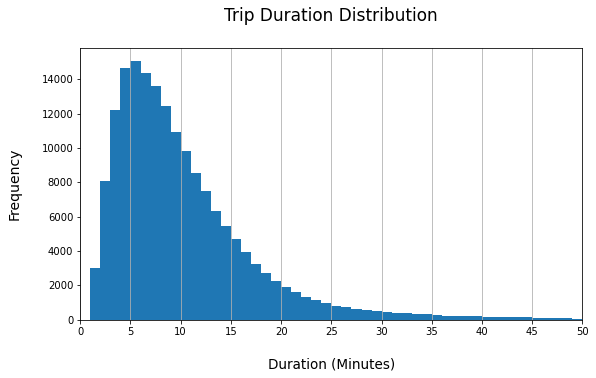

In [42]:
bins = np.arange(0, 50 + 1, 1)
ticks = np.arange(0, 50 + 1, 5)

plt.figure(figsize = [9, 5])
plt.hist(df2.duration_min, bins = bins);
plt.xlim(left = 0, right = 50)
plt.title("Trip Duration Distribution\n", fontsize = 17)
plt.xlabel("\nDuration (Minutes)", fontsize = 13.5)
plt.ylabel("Frequency\n", fontsize = 14)
plt.xticks(ticks)
plt.grid(axis = "x");

This histogram makes it easier (for me, at least) to grasp that most trips last about 4-10 minutes.

## Bivariate Exploration

Let's dive into bivariate exploration!

Is there an interesting relationship between gender and user type? How many of each user type category are there per gender category?

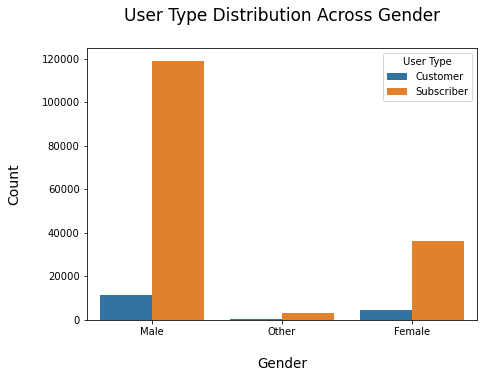

In [46]:
# Use a countplot, but encode 'user_type' with color using the hue argument, dividing each category in two
plt.figure(figsize = [7, 5])
sb.countplot(data = df2, x = "member_gender", hue = "user_type")
plt.title("User Type Distribution Across Gender\n", fontsize = 17)
plt.legend(title = "User Type")
plt.xlabel("\nGender", fontsize = 13.5)
plt.ylabel("Count\n", fontsize = 14);

Because of the large differences within each category, this clustered bar chart doesn't really tell us anything new, it just tells us what the univariate bar chart and pie chart already told us separately, that the largest user group is male subscribers.

Is there any relationship between age and duration (minutes), i.e., is there any correlation between age and the duration of a trip?

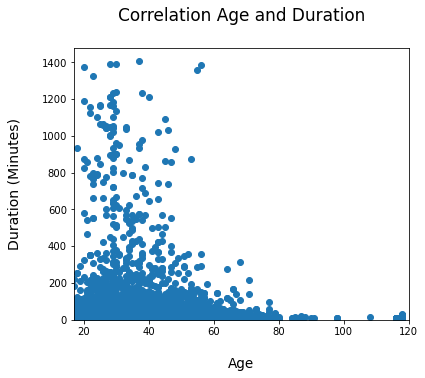

In [51]:
# Use pyplot to create a basic scatterplot
plt.figure(figsize = [6, 5])
plt.scatter(data = df2, x = "age", y = "duration_min")
plt.title("Correlation Age and Duration\n", fontsize = 17)
plt.xlabel("\nAge", fontsize = 13.5)
plt.ylabel("Duration (Minutes)\n", fontsize = 14)
plt.xlim(17, 120) # Limit the chart to ages between 17 and 120
plt.ylim(bottom = 0);

There seems to be a negative relationship between age and duration, but some adjustments might make the negative correlation more clear:

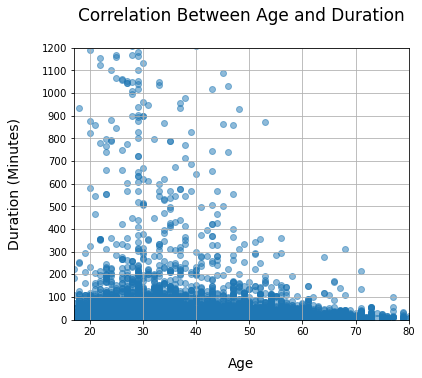

In [52]:
yticks = np.arange(0, 1200 + 1, 100) # Add extra ticks to the y-axis for a more precise analysis

plt.figure(figsize = [6, 5])
plt.scatter(data = df2, x = "age", y = "duration_min", alpha = 0.5) # Add transparency to make density stand out
plt.title("Correlation Between Age and Duration\n", fontsize = 17)
plt.xlabel("\nAge", fontsize = 13.5)
plt.ylabel("Duration (Minutes)\n", fontsize = 14)
plt.xlim(17, 80)# Limit the chart to ages between 17 and 80
plt.ylim(0, 1100) # Limit the chart to trip durations up to 1100 minutes
plt.yticks(yticks)
plt.grid();

Now we have a more informative (and aesthetically pleasing) scatterplot, showing us that as the age of the user decreases, so does the duration of the trip, a trend that is most clear for trip durations below 150 minutes; there's a much less clear trend for trips longer than that, but trip durations for users over 50 are generally within a much more narrow range.


What does the average trip duration across the gender categories look like?

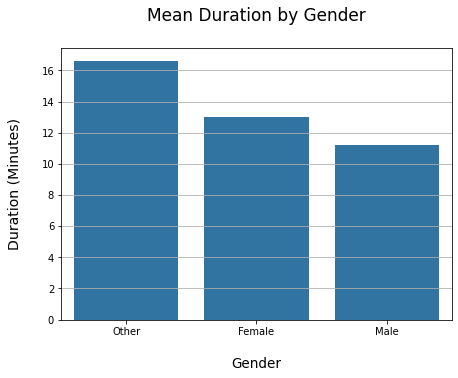

In [54]:
gender_duration_order = df2.groupby("member_gender").duration_min.mean().sort_values(ascending = False).index
base_color = sb.color_palette()[0]

# Use seaborn's barplot and add duration on the y-axis to measure the mean duration per category instead of count
plt.figure(figsize = [7, 5])
mdg = sb.barplot(data = df2, x = "member_gender", y = "duration_min", color = base_color, 
                 order = gender_duration_order, ci = None)
plt.title("Mean Duration by Gender\n", fontsize = 17)
plt.xlabel("\nGender", fontsize = 13.5)
plt.ylabel("Duration (Minutes)\n", fontsize = 14)
plt.grid(axis = "y");

Interestingly, this chart displays the reverse order of the very first univariate bar chart in this exploratory analysis: the smallest gender category by size, 'other', is the one whose trips, on average, last the longest, while the largest gender category by size, 'male', is the one whose trips are, on average, the shortest.

## Multivariate Exploration

And now it's time for some multivariate exploration!

Is there a correlation between age, duration, and gender?

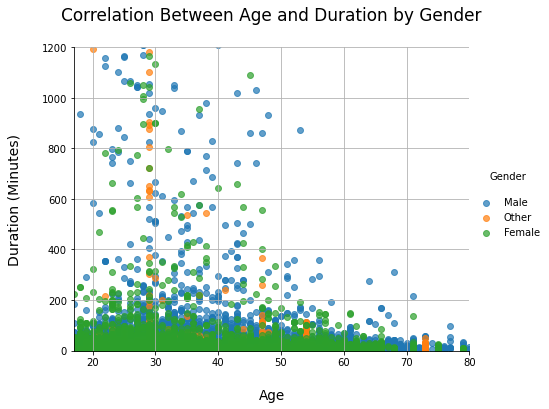

In [55]:
# Use seaborn's 'FacetGrid' function to color encode gender onto the previous age-duration scatterplot
g = sb.FacetGrid(data = df2, hue = "member_gender", height = 5, aspect = 1.3,
                 xlim = (17, 80), ylim = (0, 1200))
g.map(plt.scatter, "age", "duration_min", alpha = 0.7)
g.add_legend(title = "Gender\n")
plt.title("Correlation Between Age and Duration by Gender\n", fontsize = 17)
plt.xlabel("\nAge", fontsize = 13.5)
plt.ylabel("Duration (Minutes)\n", fontsize = 14)
plt.grid();

I'm unsure what to make of this, so I'll try to make some adjustments to the chart:

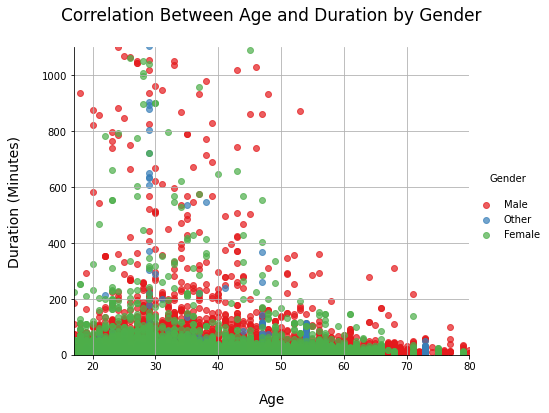

In [57]:
# Change the color palette to see if it makes the chart easier to interpret
g = sb.FacetGrid(data = df2, hue = "member_gender", height = 5, aspect = 1.3,
                 xlim = (17, 80), ylim = (0, 1100), palette = "Set1")
g.map(plt.scatter, "age", "duration_min", alpha = 0.7) # Add transparency
g.add_legend(title = "Gender\n")
plt.title("Correlation Between Age and Duration by Gender\n", fontsize = 17)
plt.xlabel("\nAge", fontsize = 13.5)
plt.ylabel("Duration (Minutes)\n", fontsize = 14)
plt.grid();

This still feels challenging to interpret. The color encoding hasn't been useful to me so far, so I'll try a different approach:

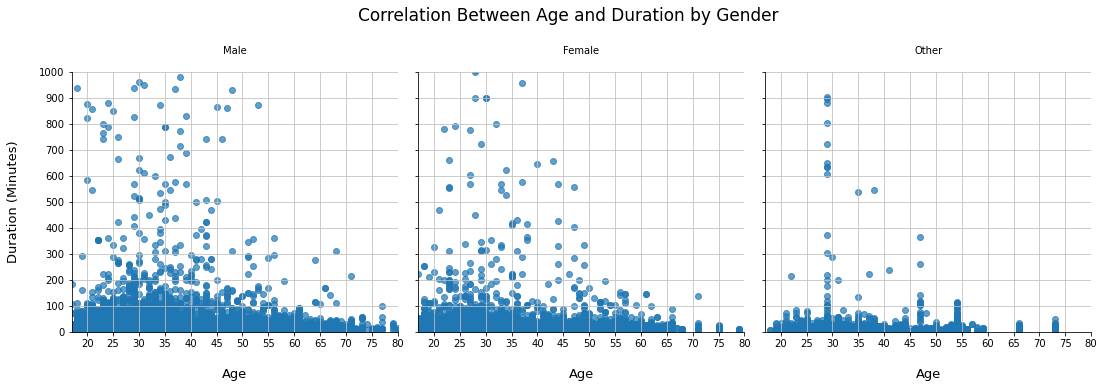

In [67]:
xticks = np.arange(20, 80 + 1, 5)
yticks = np.arange(0, 1000 + 1, 100)

# Use seaborn's FacetGrid to add gender as a 'col' argument, creating one scatterplot for each gender category
g = sb.FacetGrid(data = df2, col = "member_gender", col_order = gender_order, 
                 height = 5, aspect = 1, xlim = (17, 80), ylim = (0, 1000))
g.map(plt.scatter, "age", "duration_min", alpha = 0.7)
g.map(plt.grid, color = "silver")
g.fig.subplots_adjust(top = 0.8)
g.fig.suptitle("Correlation Between Age and Duration by Gender", fontsize = 17)
g.set_titles(col_template = "{col_name}\n")
g.set_axis_labels("\nAge", "Duration (Minutes)\n", fontsize = 13)
plt.xticks(xticks)
plt.yticks(yticks);

Creating one scatterplot for each gender category makes it much easier to interpret the data. The 'male' category follows the general pattern of the bivariate scatterplot, and the 'female' category does as well, albeit with a slightly steeper drop in the range of trip durations around the age of 50; the 'other' category looks more distinct, with a very wide range of trip durations at about the age of 30 which creates a "pillar" in the middle of trip durations that are otherwise generally below 100 minutes.

Is there any correlation between age, duration, gender, and user type?

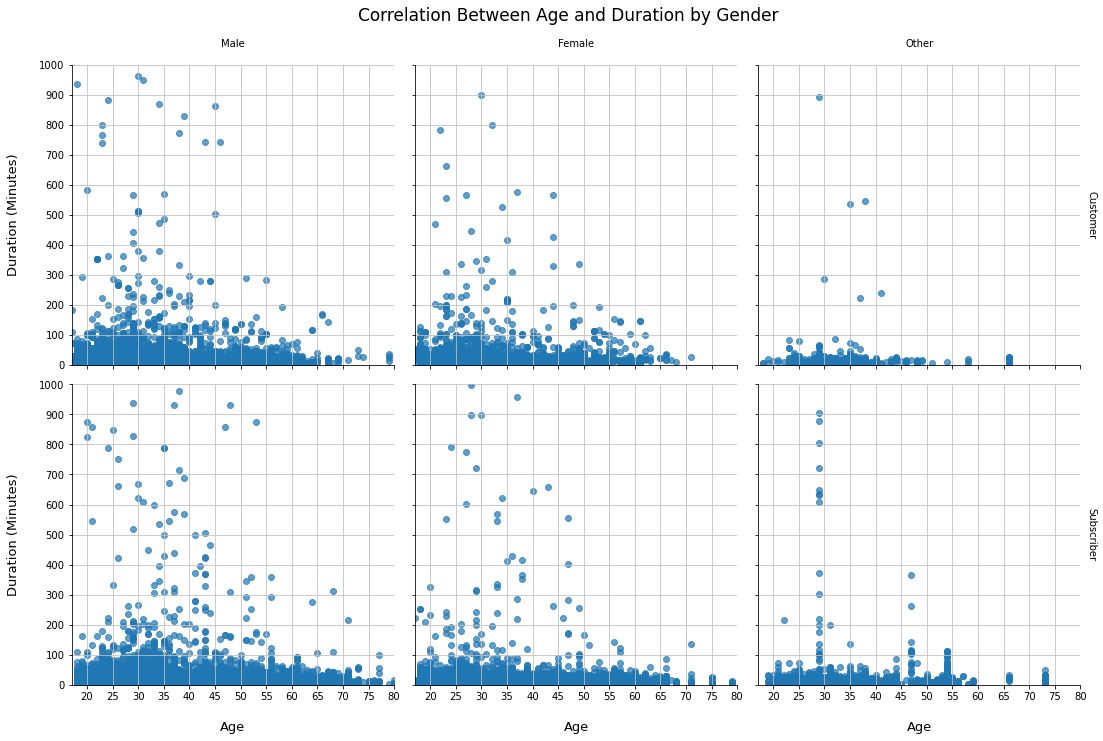

In [68]:
xticks = np.arange(20, 80 + 1, 5)
yticks = np.arange(0, 1000 + 1, 100)

# Create another almost identical facet grid and add user type a 'row' argument
g = sb.FacetGrid(data = df2, col = "member_gender", row = "user_type", col_order = gender_order, 
                 height = 5, aspect = 1, xlim = (17, 80), ylim = (0, 1000), margin_titles = True)
g.map(plt.scatter, "age", "duration_min", alpha = 0.7)
g.map(plt.grid, color = "silver")
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle("Correlation Between Age and Duration by Gender", fontsize = 17)
g.set_titles(col_template = "{col_name}\n", row_template = "{row_name}")
g.set_axis_labels("\nAge", "Duration (Minutes)\n", fontsize = 13)
plt.xticks(xticks)
plt.yticks(yticks);

I don't really see anything new in these scatterplots, so, in this case, a fourth variable didn't seem to give us any more insight into the data.